#Din 1


##Handling Date

In [2]:
pip install yfinance

In [30]:
import yfinance as yf
import datetime

# Símbolo de la acción y fechas de inicio y fin
symbol = "AAPL"
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

# Obtener datos históricos
historical_data = yf.download(symbol, start=start_date, end=end_date)

# Mostrar los primeros registros del DataFrame
#print(historical_data.head())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953873   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669983   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.943985   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056961   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225037   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


In [32]:
import yfinance as yf

# Símbolo de la acción que estás siguiendo (por ejemplo, Apple)
symbol = 'AAPL'

# Descarga los datos de ticks en tiempo real
ticker = yf.Ticker(symbol)
ticks = ticker.history(period='1d', interval='1m')  # Obtén datos cada minuto

print(ticks.head())
#ticks

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-01-24 09:30:00-05:00  195.419998  195.839996  195.389999  195.791702   
2024-01-24 09:31:00-05:00  195.789993  196.139999  195.759995  196.059998   
2024-01-24 09:32:00-05:00  196.050003  196.380005  196.020004  196.162003   
2024-01-24 09:33:00-05:00  196.160004  196.270004  196.050293  196.225006   
2024-01-24 09:34:00-05:00  196.229996  196.250000  195.850006  195.865005   

                            Volume  Dividends  Stock Splits  
Datetime                                                     
2024-01-24 09:30:00-05:00  1551597        0.0           0.0  
2024-01-24 09:31:00-05:00   572062        0.0           0.0  
2024-01-24 09:32:00-05:00   283344        0.0           0.0  
2024-01-24 09:33:00-05:00   205455        0.0           0.0  
2024-01-24 09:34:00-05:00   247688        0.0           0.0  


##Análisis de tendencia


[*********************100%%**********************]  1 of 1 completed


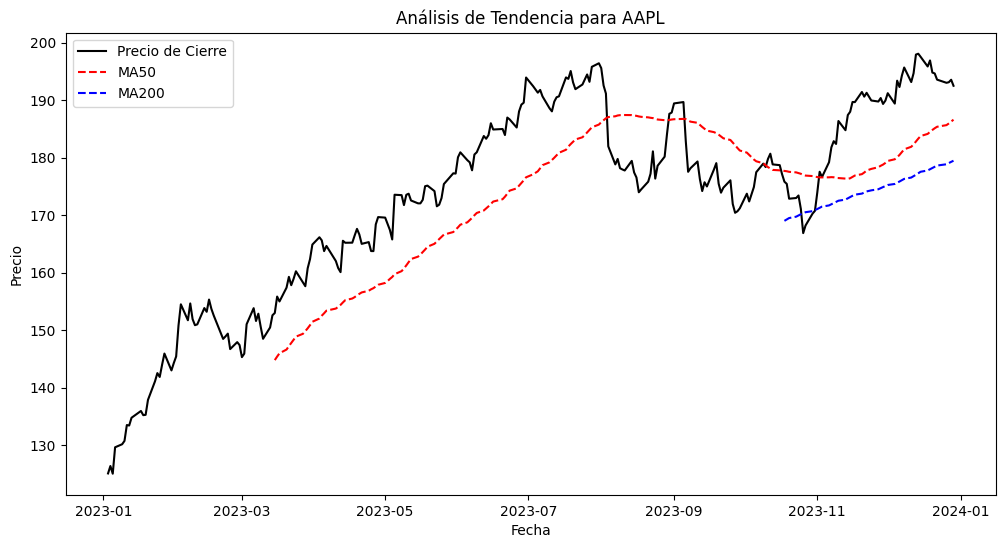

Tendencia: Alcista


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def analisis_activos(symbol, start_date, end_date):
    # Obtener datos del activo
    data = yf.download(symbol, start=start_date, end=end_date)

    # Calcular medias móviles
    data['MA50'] = data['Close'].rolling(window=50).mean()
    data['MA200'] = data['Close'].rolling(window=200).mean()

    # Graficar los precios de cierre y las medias móviles
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Precio de Cierre', color='black')
    plt.plot(data['MA50'], label='MA50', color='red', linestyle='--')
    plt.plot(data['MA200'], label='MA200', color='blue', linestyle='--')
    plt.title('Análisis de Tendencia para {}'.format(symbol))
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.show()

    # Identificar la tendencia
    if data['MA50'][-1] > data['MA200'][-1]:
        print("Tendencia: Alcista")
    elif data['MA50'][-1] < data['MA200'][-1]:
        print("Tendencia: Bajista")
    else:
        print("Tendencia: Indefinida")

# Ejemplo de uso
symbol = 'AAPL'  # Símbolo de Apple, puedes cambiarlo por otro
start_date = '2023-01-01'
end_date = '2024-01-01'

analisis_activos(symbol, start_date, end_date)


[*********************100%%**********************]  1 of 1 completed


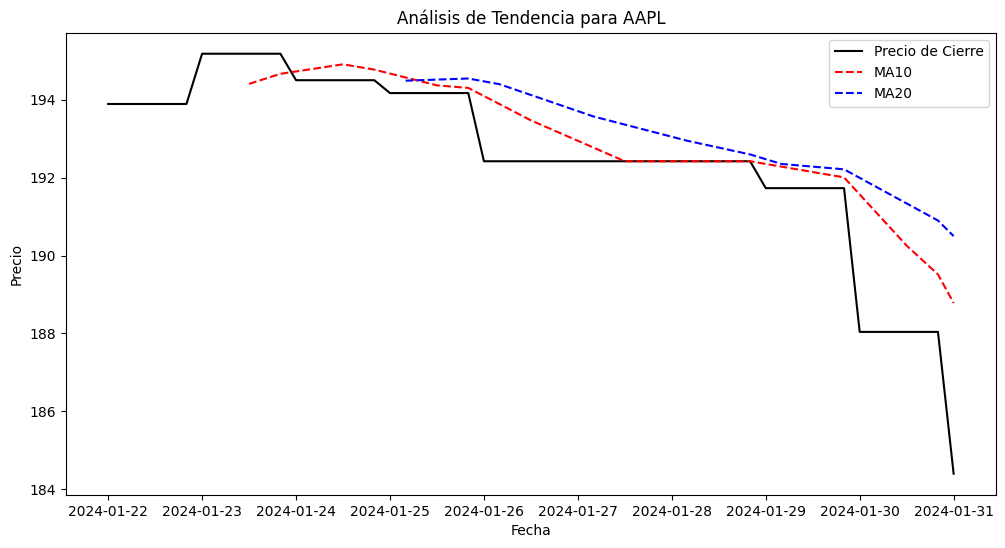

Tendencia: Bajista


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def analisis_activos(symbol, start_date, end_date):
    # Obtener datos del activo con intervalo diario
    data = yf.download(symbol, start=start_date, end=end_date, interval='1d')

    # Remuestrear los datos para tener un intervalo de 4 horas
    data = data.resample('4h').ffill()

    # Calcular medias móviles
    data['MA10'] = data['Close'].rolling(window=10).mean()  # Media móvil de 10 períodos (equivalente a 1 día)
    data['MA20'] = data['Close'].rolling(window=20).mean()  # Media móvil de 20 períodos (equivalente a 2 días)

    # Graficar los precios de cierre y las medias móviles
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Precio de Cierre', color='black')
    plt.plot(data['MA10'], label='MA10', color='red', linestyle='--')
    plt.plot(data['MA20'], label='MA20', color='blue', linestyle='--')
    plt.title('Análisis de Tendencia para {}'.format(symbol))
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.show()

    # Identificar la tendencia
    if data['MA10'].iloc[-1] > data['MA20'].iloc[-1]:
        print("Tendencia: Alcista")
    elif data['MA10'].iloc[-1] < data['MA20'].iloc[-1]:
        print("Tendencia: Bajista")
    else:
        print("Tendencia: Indefinida")

# Ejemplo de uso
symbol = 'AAPL'  # Símbolo de Apple, puedes cambiarlo por otro
start_date = '2024-01-22'
end_date = '2024-02-20'

analisis_activos(symbol, start_date, end_date)


[*********************100%%**********************]  1 of 1 completed


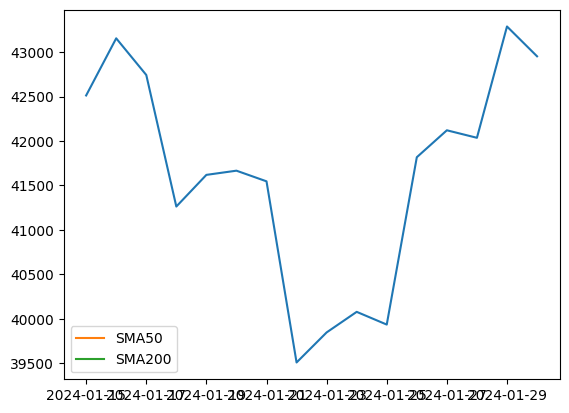

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


In [13]:
import yfinance as yf
import matplotlib.pyplot as plt

# Importar el activo
ticker = "BTC-USD"

# Descargar los datos del activo
data = yf.download(ticker, start="2024-01-15", end="2024-01-31")

# Calcular la media móvil simple de 50 días
sma50 = data["Close"].rolling(window=50).mean()

# Calcular la media móvil simple de 200 días
sma200 = data["Close"].rolling(window=200).mean()

# Definir las señales de compra y venta
def señales(data, sma50, sma200):
    señales = []
    for i in range(len(data)):
        if data["Close"][i] > sma50[i] and data["Close"][i] > sma200[i]:
            señales.append("Compra")
        elif data["Close"][i] < sma50[i] and data["Close"][i] < sma200[i]:
            señales.append("Venta")
        else:
            señales.append("")
    return señales

# Obtener las señales
señales = señales(data, sma50, sma200)

# Visualizar los datos
plt.plot(data["Close"])
plt.plot(sma50, label="SMA50")
plt.plot(sma200, label="SMA200")
plt.legend()
plt.show()

# Imprimir las señales
print(señales)


[*********************100%%**********************]  1 of 1 completed


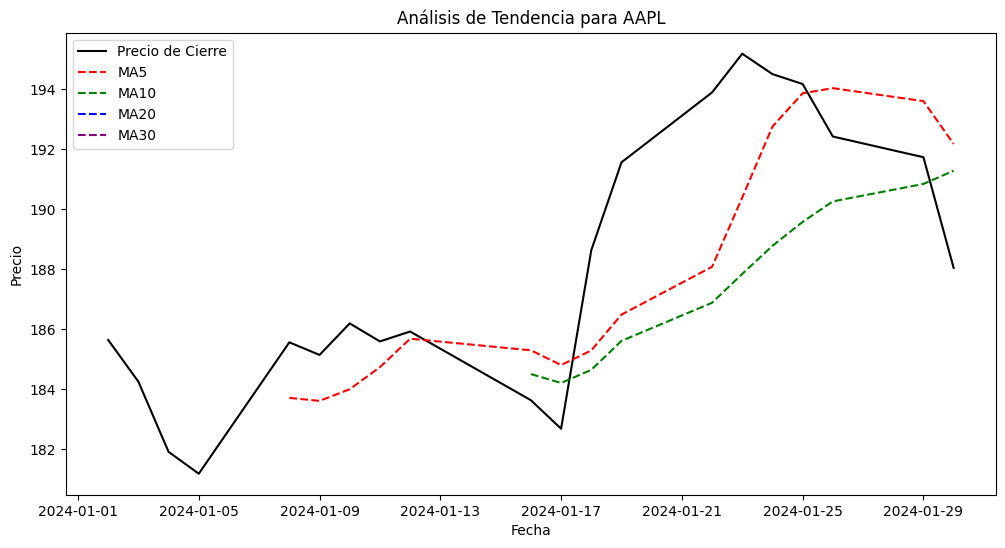

Tendencia: Indefinida


In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def analisis_activos(symbol, start_date, end_date):
    # Obtener datos del activo
    data = yf.download(symbol, start=start_date, end=end_date)

    # Calcular medias móviles
    data['MA50'] = data['Close'].rolling(window=50).mean()
    data['MA200'] = data['Close'].rolling(window=200).mean()
    data['MA5'] = data['Close'].rolling(window=5).mean()
    data['MA10'] = data['Close'].rolling(window=10).mean()
    data['MA20'] = data['Close'].rolling(window=20).mean()
    data['MA30'] = data['Close'].rolling(window=30).mean()

    # Graficar los precios de cierre y las medias móviles
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Precio de Cierre', color='black')
    plt.plot(data['MA5'], label='MA5', color='red', linestyle='--')
    plt.plot(data['MA10'], label='MA10', color='green', linestyle='--')
    plt.plot(data['MA20'], label='MA20', color='blue', linestyle='--')
    plt.plot(data['MA30'], label='MA30', color='purple', linestyle='--')
   # plt.plot(data['MA50'], label='MA50', color='red', linestyle='-')
   # plt.plot(data['MA200'], label='MA200', color='blue', linestyle='-')
    plt.title('Análisis de Tendencia para {}'.format(symbol))
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.legend()
    plt.show()

    # Identificar la tendencia
    if data['MA50'][-1] > data['MA200'][-1]:
        print("Tendencia: Alcista")
    elif data['MA50'][-1] < data['MA200'][-1]:
        print("Tendencia: Bajista")
    else:
        print("Tendencia: Indefinida")

# Ejemplo de uso
symbol = 'AAPL'   # Símbolo de Apple, puedes cambiarlo por otro
start_date = '2024-01-01'
end_date = '2024-01-31'

analisis_activos(symbol, start_date, end_date)


##Tendencia

In [23]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=4643275e7e17102a17f6dc8222ad8cb4665f060f8307fe9c4689d552df6d5187
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_ta as ta  # Import for MACD and RSI calculations

# Adjust download dates to a 7-day range
ticker = "AAPL"
start = "2024-01-25"
end = "2024-01-31"
interval = "1m"

data = yf.download(ticker, start=start, end=end, interval=interval)

# Check for the correct date column and potentially create it
if "Date" not in data.columns:
    data["Date"] = pd.to_datetime(data.index)  # Assuming index holds timestamp

# Calculate moving averages
short_ma = data["Close"].rolling(window=5).mean()
medium_ma = data["Close"].rolling(window=10).mean()
long_ma = data["Close"].rolling(window=15).mean()

# Calculate oscillators using pandas_ta and access results
macd = ta.macd(data["Close"])  # Calculate MACD using pandas_ta
rsi = ta.rsi(data["Close"])   # Calculate RSI using pandas_ta

# Access the desired components from the returned MACD object
plt.plot(data["Date"], macd.macd())  # Plot MACD line
plt.plot(data["Date"], macd.signal())  # Plot signal line
plt.bar(data["Date"], macd.diff(), color='gray', alpha=0.5)  # Plot MACD difference (histogram) as bars

# Plot other data as usual
plt.plot(data["Date"], data["Close"])
plt.plot(data["Date"], short_ma)
plt.plot(data["Date"], medium_ma)
plt.plot(data["Date"], long_ma)
plt.plot(data["Date"], rsi.rsi())

# Add labels and title
plt.title("Análisis de tendencias para intradia")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()


[*********************100%%**********************]  1 of 1 completed


AttributeError: 'DataFrame' object has no attribute 'macd'